# Machine Learning models on the chess dataset
In this part I am going to try various prediction algorithm based on different feature.

## Predicting the winner of the game
I will try to predict the outcome of the game, winner and victory status combined, based on few features which are 'turns', 'black_rating', 'white_rating', 'opening_code' and 'opening-play'.
I am going to use a Random Forest Algorithm. This algorithm is perfect for predicting something categorical.

In [17]:
#Importing modules and librairies

import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')

df_games = pd.read_csv("CSV_Output/games_cleaned.csv")
#Setting target features
df_games['target'] = df_games['winner'].astype(str) + '-' + df_games['victory_status'].astype(str)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
 16  target          19113 non-null  object 
dtypes: bool(1), float64(2), int64(4

### Preparing the dataset for training
The first we need to do is encoding the categorical features in order to make it easier for our model to processing them. In the next cell I print the number of unique categories in each categorical feature in order to decide wich encoding method I can use.

In [18]:
#Redunce the dataset to the features we want to use
dataset = df_games[['turns', 'target', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply']]
print(dataset['target'].unique())
print(dataset['opening_eco'].unique())
len(dataset['opening_eco'].unique())

['white-outoftime' 'black-resign' 'white-mate' 'draw-draw' 'white-resign'
 'black-mate' 'black-outoftime' 'draw-outoftime']
['D10' 'B00' 'C20' 'B27' 'D00' 'C50' 'B01' 'A00' 'C02' 'C00' 'C57' 'C41'
 'C55' 'A40' 'B20' 'A25' 'B21' 'D01' 'C45' 'D06' 'B52' 'D20' 'B06' 'A45'
 'B77' 'A21' 'B70' 'B23' 'B76' 'C21' 'A80' 'A20' 'A04' 'C26' 'C44' 'E10'
 'A41' 'C01' 'D02' 'A10' 'C18' 'A47' 'C10' 'D80' 'D30' 'D41' 'B03' 'B29'
 'B02' 'B13' 'B57' 'E20' 'E11' 'C40' 'C11' 'C28' 'A46' 'B30' 'A56' 'C65'
 'B90' 'B50' 'B51' 'E00' 'C70' 'B11' 'B22' 'B40' 'B31' 'B18' 'C61' 'C78'
 'B10' 'C42' 'D07' 'B32' 'C68' 'A22' 'C46' 'A02' 'C58' 'A03' 'B54' 'B12'
 'D03' 'D31' 'C69' 'A31' 'D46' 'C34' 'C48' 'C47' 'B24' 'C67' 'C60' 'E61'
 'C53' 'C23' 'B96' 'C54' 'A05' 'D92' 'A49' 'C22' 'C37' 'A09' 'A01' 'C88'
 'B34' 'C03' 'C33' 'A48' 'A11' 'A81' 'B05' 'B53' 'B08' 'C30' 'A15' 'B43'
 'C07' 'A34' 'D08' 'A30' 'A08' 'A13' 'D11' 'D50' 'A73' 'D35' 'D21' 'C64'
 'C15' 'B09' 'A52' 'E90' 'A06' 'B15' 'D17' 'A43' 'A65' 'B33' 'A67' 'C62'


365

#### Encoding the categorical features
Here I encode the two categorical features, the target and the opening code feature.
For the target feature I use Label encoding because it is an ordered feature and it is not necessary to increase the dimensionality of the dataset for that feature.
For the opening code feature I use Binary encoding because there is a high number of unique category (365) but I want to reduce dimensionality compare to one-hot encoding.

In [19]:
le = LabelEncoder()
dataset['target'] = le.fit_transform(dataset['target'])
labels = list(le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7]))
labels_correspondence = {key : value for key, value in zip(range(8), labels)} 
print(labels_correspondence)
encoder_opening = ce.BinaryEncoder(cols = ['opening_eco'])
encoded_data = encoder_opening.fit_transform(dataset)
encoded_data

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


,turns,target,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_ply
0,13,6,1500,1191,0,0,0,0,0,0,0,0,1,5
1,16,2,1322,1261,0,0,0,0,0,0,0,1,0,4
2,61,5,1496,1500,0,0,0,0,0,0,0,1,1,3
3,5,3,1250,1002,0,0,0,0,0,0,1,0,0,4
4,33,7,1520,1423,0,0,0,0,0,0,1,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,24,7,1691,1220,0,0,0,0,1,1,1,1,1,2
19109,82,0,1233,1196,0,0,0,1,0,0,1,0,1,2
19110,35,5,1219,1286,0,0,0,0,0,0,1,0,1,3
19111,109,7,1360,1227,0,1,0,0,1,1,0,1,1,4


### Random forest training and testing
In the next cell I use a Random Forest algorithm as a model to predict the winner based on the opening move, player ratings and the number of turns of the game.

In [20]:
def randomForest(data): 
    y = data['target']
    x = data.drop(['target'], axis = 1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

    rfc = RandomForestClassifier(class_weight="balanced", n_estimators=100, max_depth=None, random_state=42)
    rfc.fit(x_train, y_train)
    return rfc, x_test, y_test

rfc, x_test, y_test = randomForest(encoded_data)
y_pred = rfc.predict(x_test)

### Analysing the prediction
Based on the prediction we made we can check multiple factors on our test such as the accuracy.
We can also show the confusion matrix to see in image the accuracy of our model.

Here we can see that our model have an accuracy of 36% which is very low and for some outcome the accuracy is less than 10% !

              precision    recall  f1-score   support

           0       0.26      0.23      0.25       527
           1       0.10      0.02      0.03       177
           2       0.37      0.48      0.42      1000
           3       0.11      0.05      0.07       166
           4       0.00      0.00      0.00         9
           5       0.29      0.23      0.25       651
           6       0.08      0.01      0.02       169
           7       0.40      0.51      0.45      1124

    accuracy                           0.35      3823
   macro avg       0.20      0.19      0.19      3823
weighted avg       0.31      0.35      0.32      3823

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


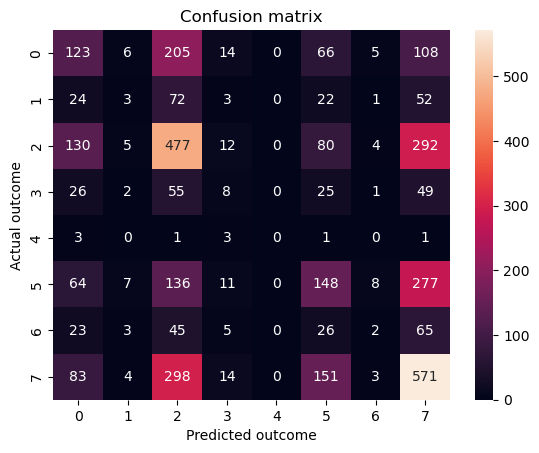

In [21]:
def confusionMatrixDisplay(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    heatmap = sns.heatmap(cm, annot=True, fmt='d')
    heatmap.set_title('Confusion matrix')
    heatmap.set_xlabel('Predicted outcome')
    heatmap.set_ylabel('Actual outcome')
    print(classification_report(y_test, y_pred))
    print(labels_correspondence)

confusionMatrixDisplay(y_test, y_pred)

To understand the low accuracy we can plot the importances rating of the features used by the Random Forest algorithm. Here we can see that the importances rating of the encoded opening codes columns are not the same, some are more commonly used by the model and this is not exactly what we want.

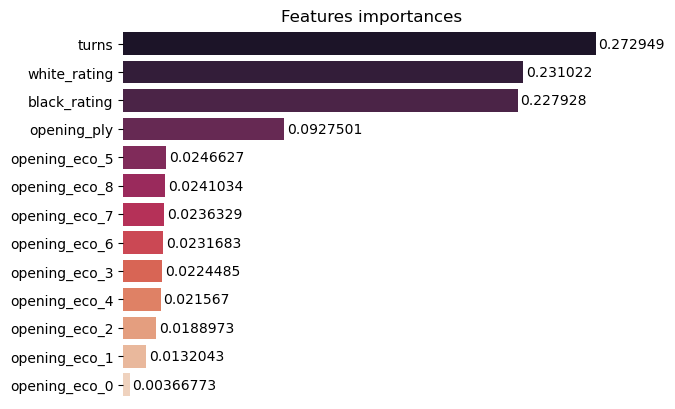

In [22]:
def featuresImportancesDisplay(rfc):
    features_df = pd.DataFrame({'features' : rfc.feature_names_in_, 'importances' : rfc.feature_importances_})

    features_df_sorted = features_df.sort_values(by='importances', ascending=False)

    plot = sns.barplot(data = features_df_sorted, x='importances', y = 'features', palette = 'rocket')
    sns.despine(bottom = True, left = True)
    plot.set_title('Features importances')
    plot.set(xlabel = None)
    plot.set(ylabel = None)
    plot.set(xticks = [])
    for value in plot.containers:
        plot.bar_label(value, padding = 2)

featuresImportancesDisplay(rfc)

### Label Encoding the opening feature
I am going to use a different enconding technique to see if I can have a better accuracy of the random forest model.

In [23]:
dataset['opening_eco'] = le.fit_transform(dataset['opening_eco'])
dataset

,turns,target,white_rating,black_rating,opening_eco,opening_ply
0,13,6,1500,1191,248,5
1,16,2,1322,1261,71,4
2,61,5,1496,1500,171,3
3,5,3,1250,1002,96,4
4,33,7,1520,1423,239,10
...,...,...,...,...,...,...
19108,24,7,1691,1220,61,2
19109,82,0,1233,1196,37,2
19110,35,5,1219,1286,239,3
19111,109,7,1360,1227,78,4


### Execution of the Random Forest and camparison
There is a very little improvement in the accuracy of the model (1%). But overall the precision of the prediction remain quite the same

              precision    recall  f1-score   support

           0       0.29      0.26      0.27       527
           1       0.07      0.01      0.02       177
           2       0.38      0.47      0.42      1000
           3       0.12      0.04      0.06       166
           4       0.00      0.00      0.00         9
           5       0.32      0.26      0.29       651
           6       0.07      0.01      0.02       169
           7       0.42      0.56      0.48      1124

    accuracy                           0.37      3823
   macro avg       0.21      0.20      0.19      3823
weighted avg       0.33      0.37      0.34      3823

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


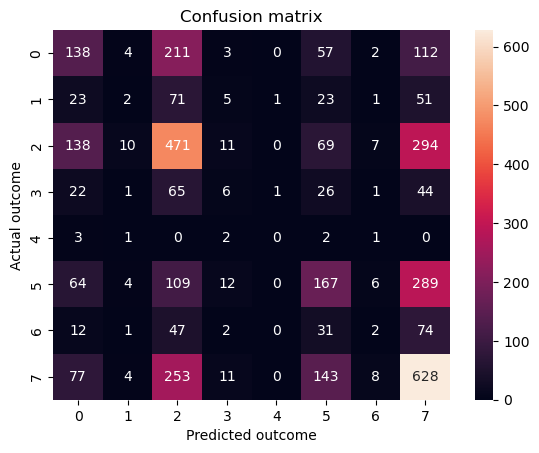

In [24]:
rfc, x_test, y_test = randomForest(dataset)
y_pred = rfc.predict(x_test)
confusionMatrixDisplay(y_test, y_pred)

### Features Importances comparison
There is a notable change in the importance given by the model to the opening code feature. This is due to the label encoding technique which create a certain hierarchy between the openings. This create some bias but as we saw earlier the accuracy remain the same

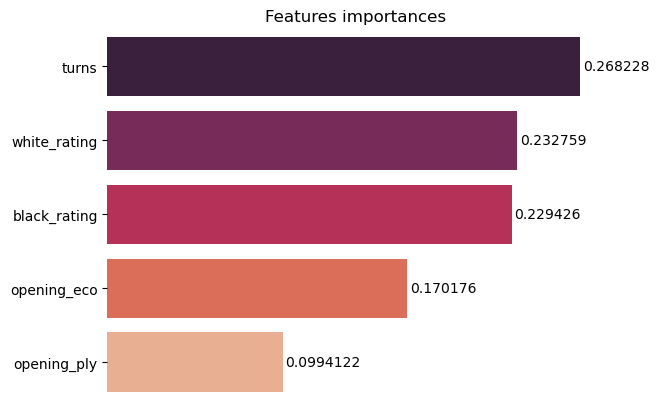

In [25]:
featuresImportancesDisplay(rfc)

### Another strategy to improve the accuracy
From now the accuracy of our model is very low because we use features that in our opinion might influence the game. But actually, if we see the correlation Matrix in the file "DataAnalysisTH.ipynb", only three original features are correlated with the winning feature. These are the number of turns in the game and the ratings of the player. So in this next part I will use only this 3 features to see if the accuracy is better or not.

### Setup of the dataset
I will only set a new dataset with only the three features.

In [26]:
dataset = df_games[['white_rating', 'black_rating', 'turns', 'target']]
le = LabelEncoder()
dataset['target'] = le.fit_transform(dataset['target'])
dataset

,white_rating,black_rating,turns,target
0,1500,1191,13,6
1,1322,1261,16,2
2,1496,1500,61,5
3,1250,1002,5,3
4,1520,1423,33,7
...,...,...,...,...
19108,1691,1220,24,7
19109,1233,1196,82,0
19110,1219,1286,35,5
19111,1360,1227,109,7


### Execution of the Random Forest and comparison
As we can see reducing the number of feature to the one who are really correlated to the winner and victory status does not improve the accuracy unfortunately.

              precision    recall  f1-score   support

           0       0.27      0.24      0.25       527
           1       0.12      0.03      0.05       177
           2       0.40      0.48      0.44      1000
           3       0.06      0.02      0.03       166
           4       0.00      0.00      0.00         9
           5       0.31      0.25      0.28       651
           6       0.11      0.03      0.05       169
           7       0.42      0.53      0.47      1124

    accuracy                           0.36      3823
   macro avg       0.21      0.20      0.20      3823
weighted avg       0.33      0.36      0.34      3823

{0: 'black-mate', 1: 'black-outoftime', 2: 'black-resign', 3: 'draw-draw', 4: 'draw-outoftime', 5: 'white-mate', 6: 'white-outoftime', 7: 'white-resign'}


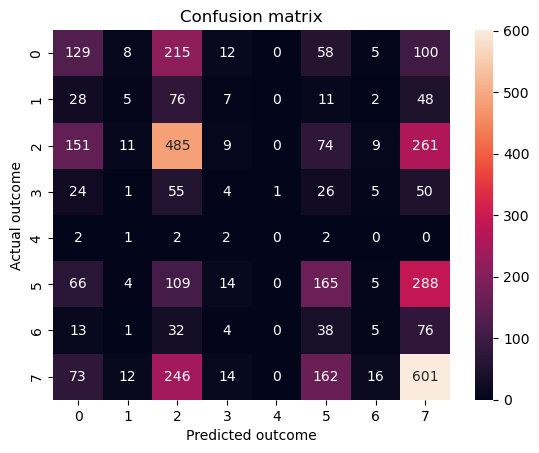

In [27]:
rfc, x_test, y_test = randomForest(dataset)
y_pred = rfc.predict(x_test)
confusionMatrixDisplay(y_test, y_pred)

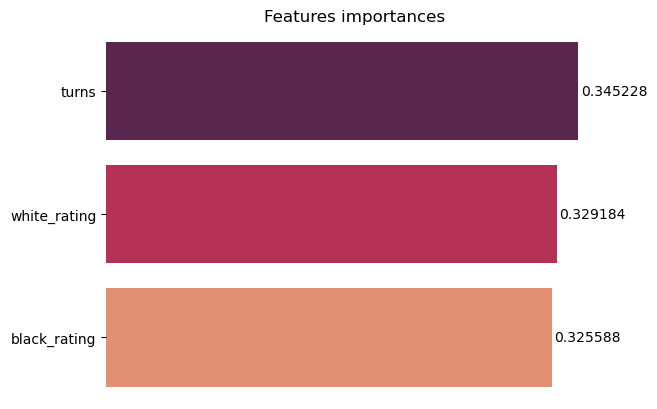

In [28]:
featuresImportancesDisplay(rfc)

### Yet another strategy
I found this [ML project](https://github.com/samiamkhan/4641Project/) on the same dataset than us. It use another strategy based on the opening moves : for each unique first moves it create a decision tree to predict the winner of the game then concatenate them to get the average accuracy of all decision trees.  
We are going to do this strategy from the x first moves to the y first moves to see what is tha accuracy of all the decision trees.  
Based on the boxplot below we can see that the majority of the opening have less than 10 moves so x and y are going to be 2 and 20 (one move for white plus one movefor black).

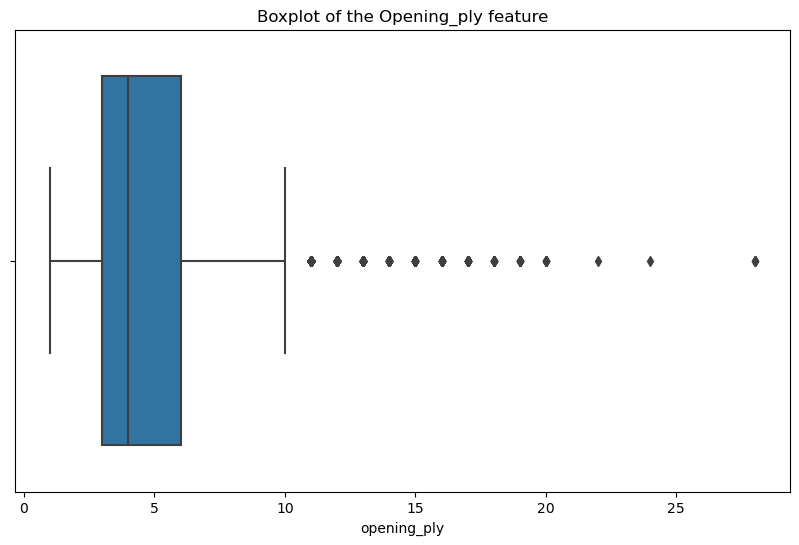

In [29]:
dataset['moves'] = df_games['moves']
dataset['id'] = df_games['id']
plt.figure(figsize=(10, 6))
sns.boxplot(x = df_games['opening_ply'])
plt.title("Boxplot of the Opening_ply feature")
plt.xlabel("opening_ply")
plt.show()

In [30]:
def multipleDecisionTree(numMoves):
    dictionnary = {}
    for index, row in dataset.iterrows():
        
        #First we get the moves
        moves = row['moves']
        movesList = moves.split()
        firstFive = " ".join(movesList[0:numMoves*2])
        
        #Store the unique first moves as key in a dictionnary with the values beeing all the game
        #where it is used.
        if firstFive in dictionnary.keys():
            dictionnary[firstFive].append(row['id'])
        else:
            dictionnary[firstFive] = [row['id']]
            
    yCorrectForCompareX = np.empty(0)
    yPredictForCompareX = np.empty(0)
    numkey = 0
    for key in dictionnary.keys():
        if len(dictionnary[key]) >= 2:
            numkey += 1
            
            #Training part
            trainingIndices = dictionnary[key][0:(int)(len(dictionnary[key]) * 0.8)]
            testingIndices = dictionnary[key][len(trainingIndices):len(dictionnary[key])]
            xTraining = np.empty((len(trainingIndices), 2))
            yTraining = np.empty(len(trainingIndices))
            count = 0
            for index in trainingIndices:
                current = dataset.loc[dataset['id'] == index]
                xTraining[count][0] = current['white_rating']
                xTraining[count][1] = current['black_rating']
                yTraining[count] = current['target']
                count += 1
            classifier = DecisionTreeClassifier()
            classifier.fit(xTraining, yTraining)
            
            #Testin part
            xTesting = np.empty((len(testingIndices), 2))
            yTestingCorrect = np.empty(len(testingIndices))
            count = 0
            for index in testingIndices:
                current = dataset.loc[dataset['id'] == index]
                xTesting[count][0] = current['white_rating']
                xTesting[count][1] = current['black_rating']
                yTestingCorrect[count] = current['target']
                count += 1
            yTestingPredictions = classifier.predict(xTesting)
            yCorrectForCompareX = np.append(yCorrectForCompareX, yTestingCorrect)
            yPredictForCompareX = np.append(yPredictForCompareX, yTestingPredictions)
        else:
            None
    return(accuracy_score(yCorrectForCompareX, yPredictForCompareX), numkey)

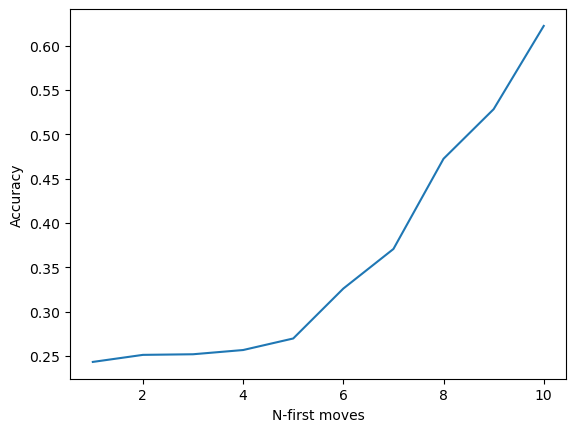

Accuracy graph as the opening length increases:


In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
graphX = np.empty(0)
graphY = np.empty(0)
for i in range(1,11):
    graphX = np.append(graphX,i)
    tup = multipleDecisionTree(i)
    numkey = tup[1]
    Acc = tup[0]
    graphY = np.append(graphY,Acc)
ax.plot(graphX, graphY)
ax.set_xlabel("N-first moves")
ax.set_ylabel("Accuracy")
plt.show()
print("Accuracy graph as the opening length increases:")